## Phonon Plotting

In [16]:
%aiida
%matplotlib inline
import toolchest.phonopy_aiida as pa
from aiida_user_addons.tools.sumo import get_sumo_phonon_plotter
from aiida_user_addons.tools.phonopy import export_phonon_work, get_phonon_obj

In [2]:
calcs = {
    'Li2FeOxF2': load_node('f421858c-2b83-461a-b695-adf8ed79bd0b'),
    'LiFeOxF': load_node('e3bc3127-f30c-45ee-9b98-3a0f38a9a6bd')
}

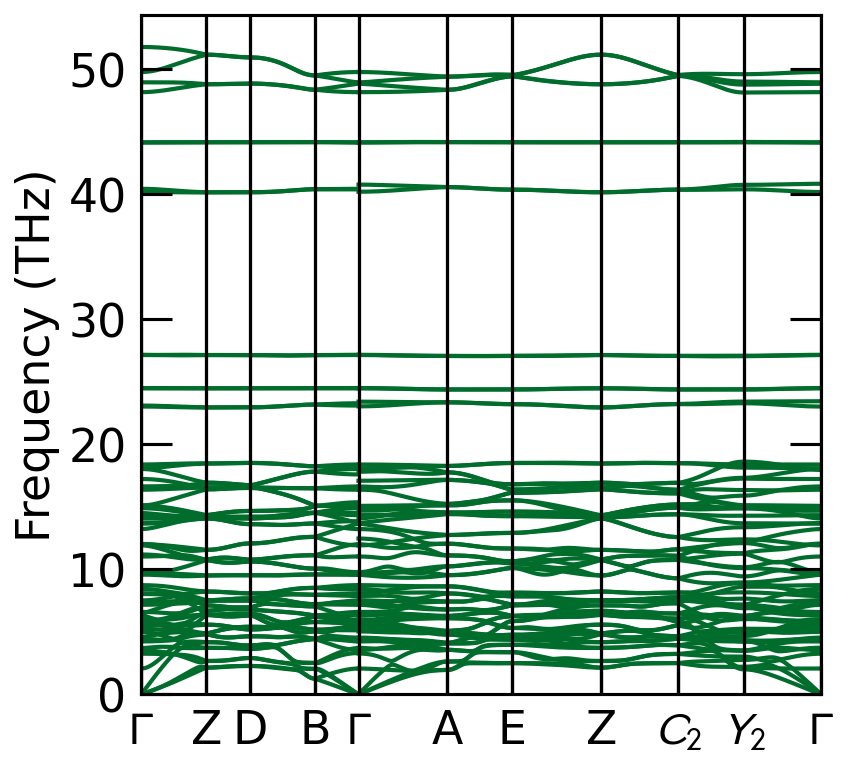

In [20]:
plotter = get_sumo_phonon_plotter(calcs['Li2FeOxF2'].outputs.band_structure, calcs['Li2FeOxF2'].inputs.structure, has_nac=False)

fig = plotter.get_plot(dpi=150)
fig.savefig('li2feoxf2-phonon.svg')

## New plotting interface

This allows reconstruction of the phonon data - some issues with primitive cell axis can be get around this way.


In [3]:
from spglib import standardize_cell
from phonopy.api_phonopy import Phonopy
from toolchest.phonopy_aiida import SumoPlotInterface

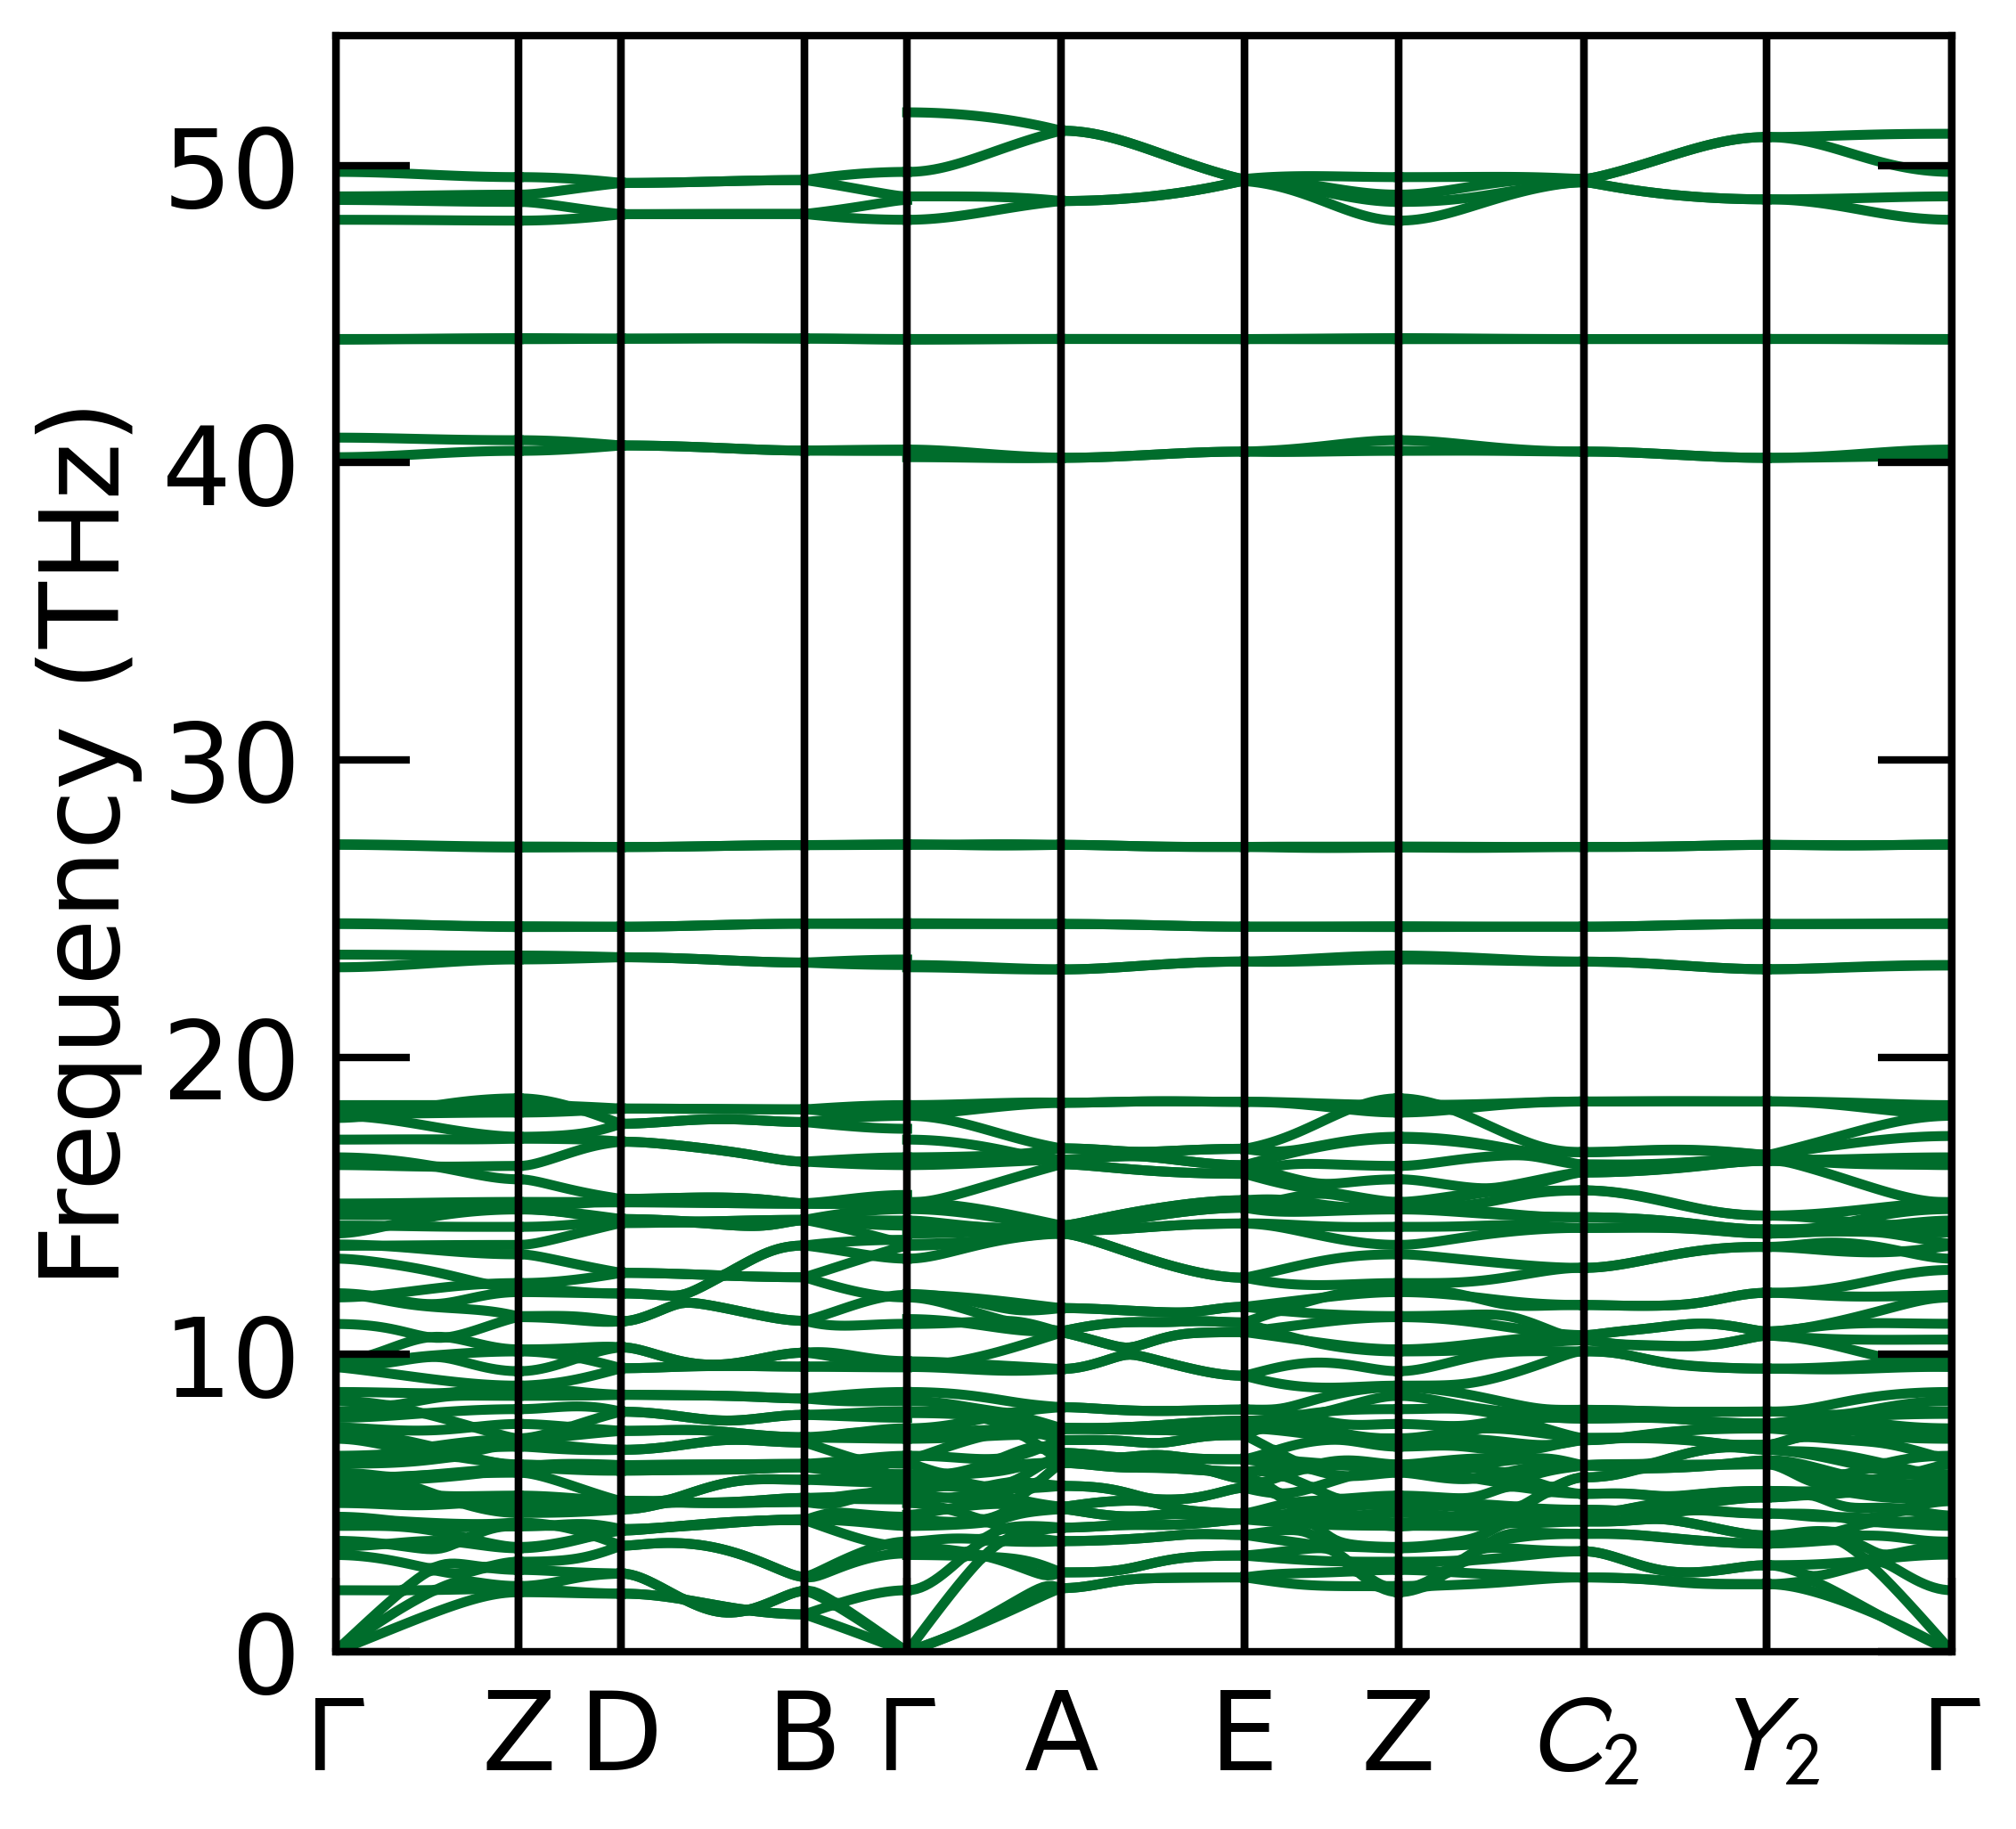

In [26]:
plotter = SumoPlotInterface.from_work_node(calcs['Li2FeOxF2'], mode='seekpath', auto_primitive=True)
plotter.get_phonon_band_structure()
p = plotter.plot_phonon_bs(dpi=150)
p.savefig('li2feoxf2-phonon.svg')

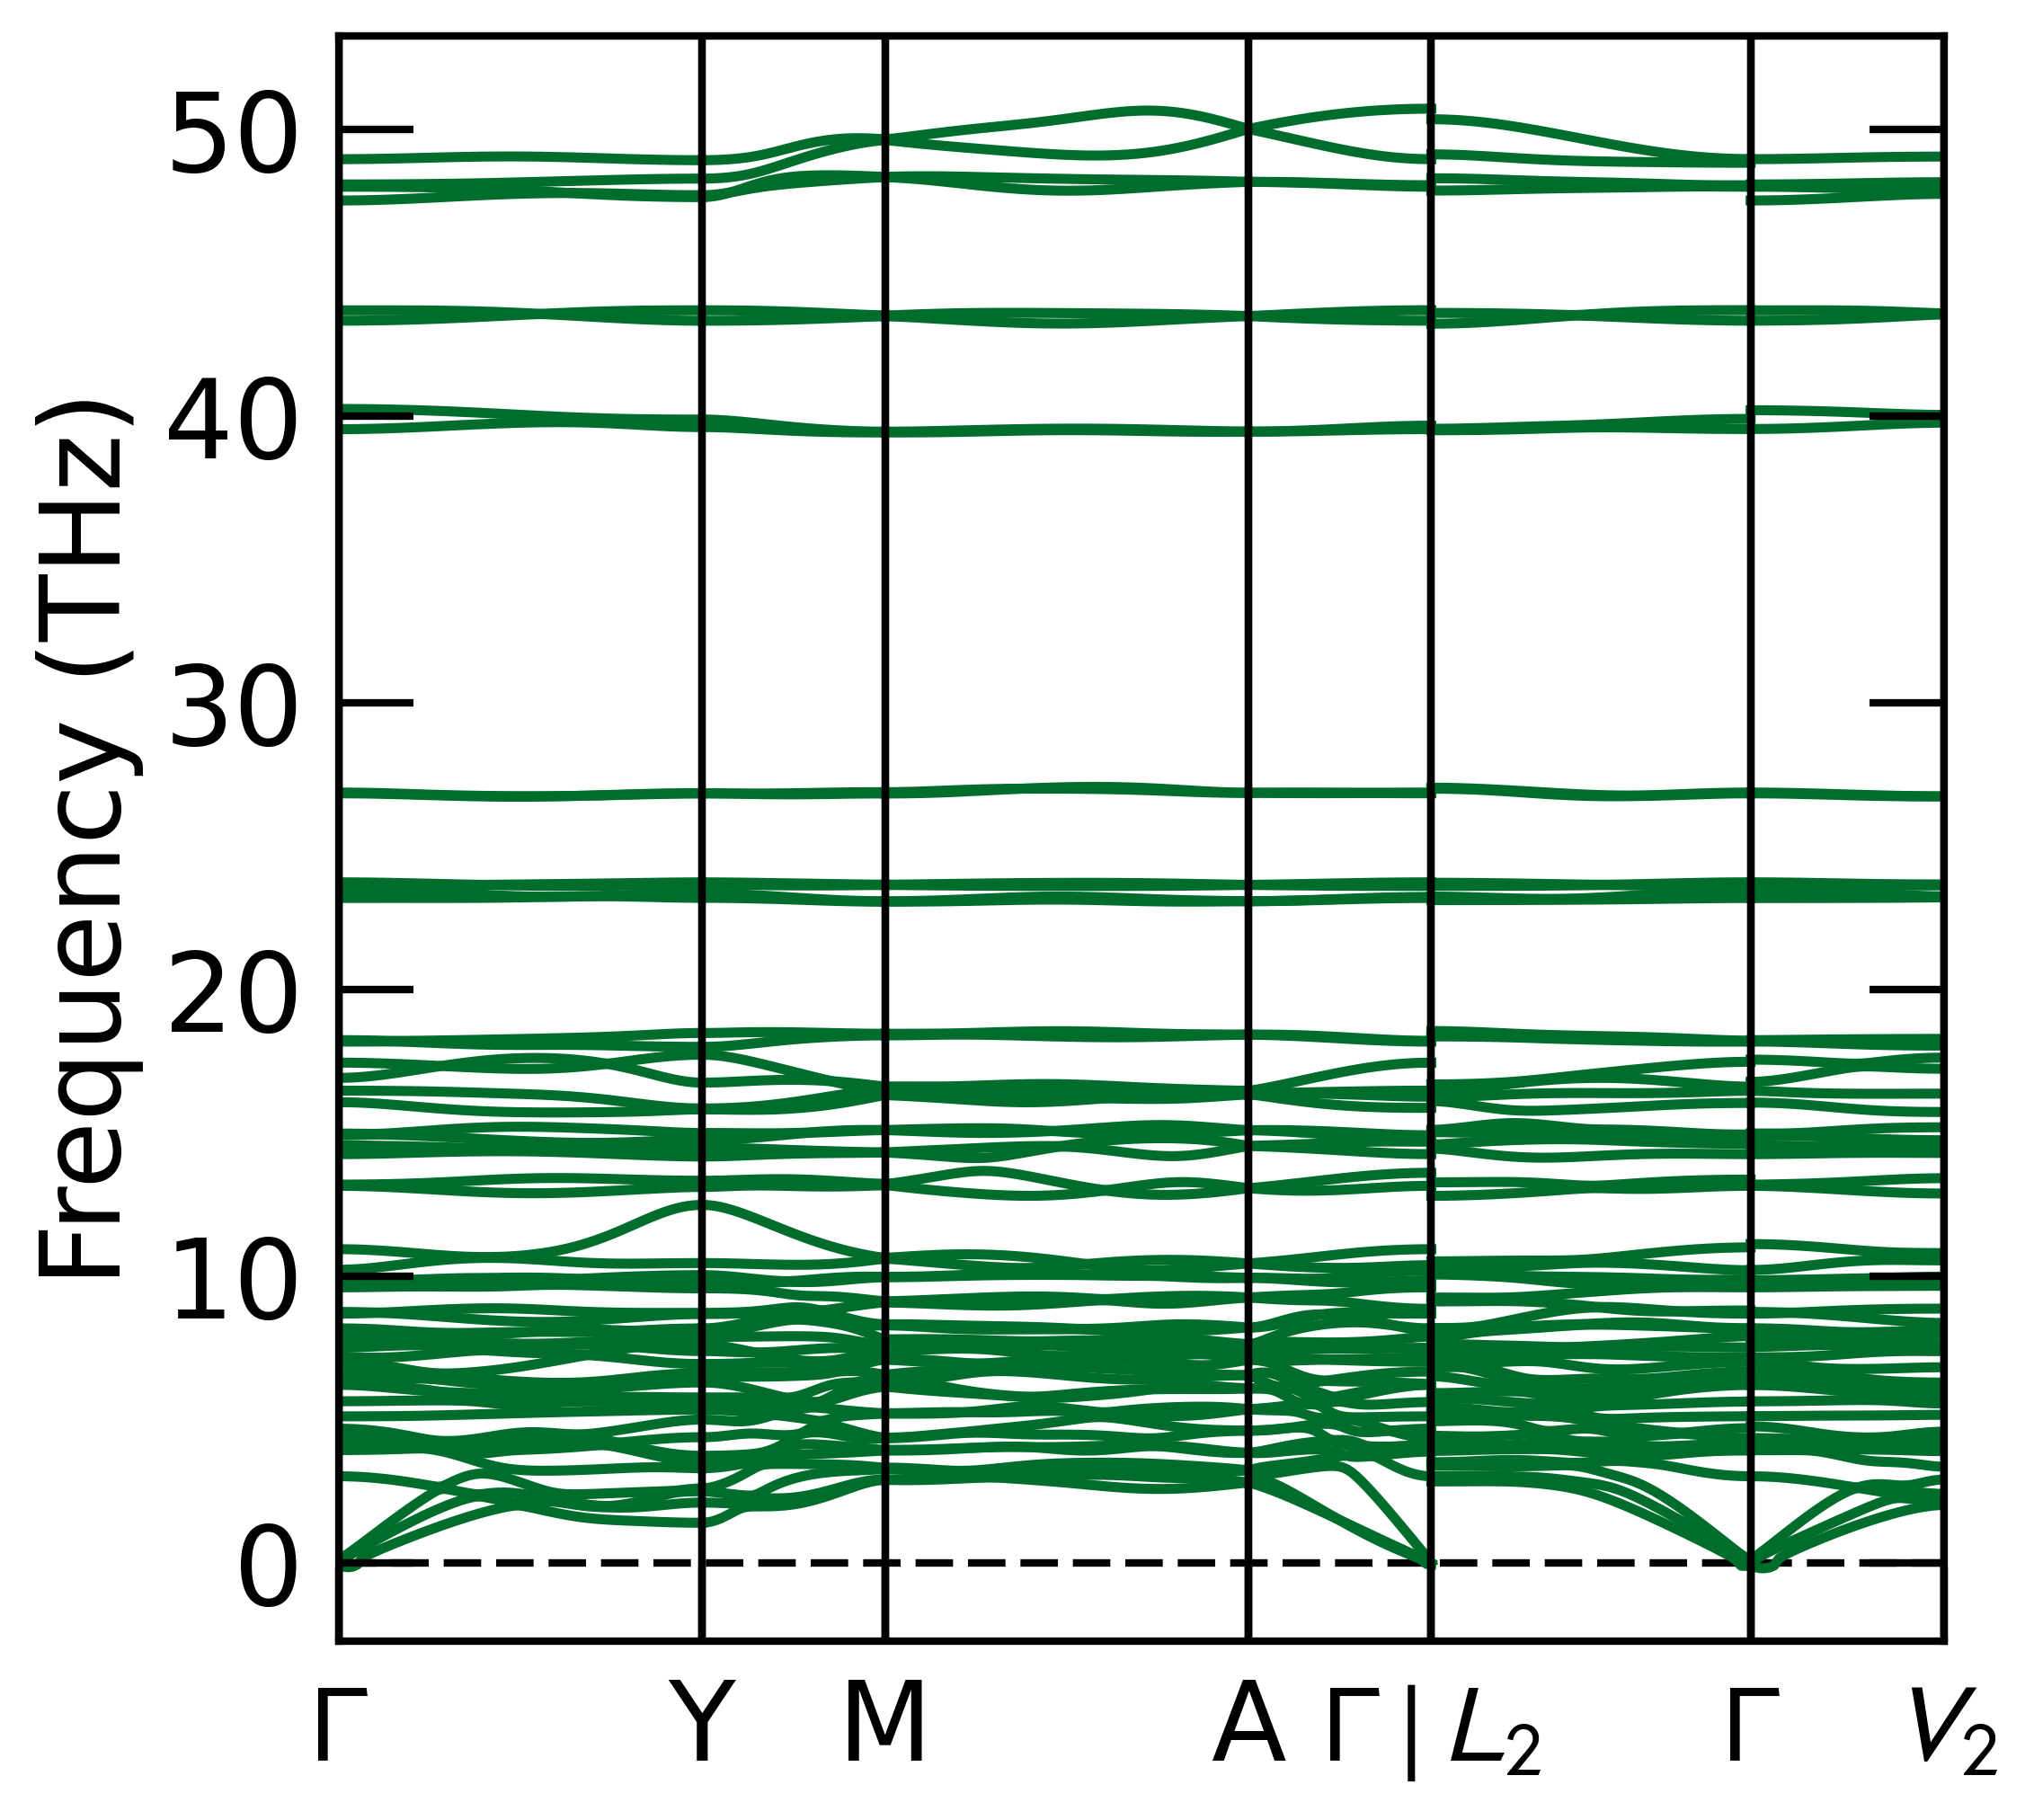

In [27]:
plotter = SumoPlotInterface.from_work_node(calcs['LiFeOxF'], mode='seekpath', auto_primitive=True)
plotter.get_phonon_band_structure()
p = plotter.plot_phonon_bs(dpi=150)
p.savefig('lifeoxf-phonon.svg')